# Unsupervised Profiling of Social Network Users Using K-Means Clustering

# Aim-
* To analyze the SNS dataset and understand user behavior patterns.

* To apply data preprocessing and feature scaling for better clustering performance.

* To implement K-Means clustering to group users based on their interests and activities.

* To identify hidden behavioral segments among SNS users.

* To evaluate cluster quality using metrics like Silhouette Score, DBI, and CH score.

## The dataset contains 30,000 SNS user profiles with 40 behavioral and demographic features, including gender, age, interests, sports activities, and lifestyle habits. Each row represents a student’s social networking behavior expressed through various binary indicators. This dataset is suitable for unsupervised learning, user segmentation, behavioral analysis, and gender prediction tasks. ##

# Feature Information
## 1 – Gender ##

A numerical label indicating the user’s gender. Typically encoded as 0 for Female and 1 for Male. This is the target variable in classification tasks.

## 2 – Behavioral & Interest Features ##

A collection of binary numerical variables (0 or 1) representing whether the user shows interest or engagement in various activities. Examples include:

* Sports activities: basketball, football, soccer, volleyball, baseball, tennis 

* Hobbies & lifestyle indicators: music, dance, shopping, clothes, mall

* Appearance-related attributes: cute, hot, sexy

* Religious interests: god, church, jesus, bible

* Risk behaviors: drugs, drunk, death

Each feature indicates whether the student frequently mentions or engages with that topic on social networking platforms.

# KMeans
K-Means is an unsupervised clustering algorithm that groups data into K clusters based on similarity. It works by assigning each data point to the nearest cluster center and updating the centers until the groups become stable. K-Means is simple, fast, and commonly used for segmentation, pattern discovery, and grouping similar data points. 

# LIBRARIES NEEDED IN THE STUDY

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
import numpy as np
from scipy.stats import mode
from sklearn.metrics import accuracy_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

## Read Data

In [89]:
pd.read_csv(r"C:\Users\Administrator\Documents\Datamites CDS\vijaySir\snsdata.csv")

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
data = pd.read_csv(r"C:\Users\Administrator\Documents\Datamites CDS\vijaySir\snsdata.csv")

# Data Analysis

In [91]:
data.isnull().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [92]:
data.gender.fillna(data['gender'].mode()[0],inplace=True)

In [93]:
data.age.fillna(data['age'].mean(),inplace=True)

In [94]:
data.isnull().sum()

gradyear        0
gender          0
age             0
friends         0
basketball      0
football        0
soccer          0
softball        0
volleyball      0
swimming        0
cheerleading    0
baseball        0
tennis          0
sports          0
cute            0
sex             0
sexy            0
hot             0
kissed          0
dance           0
band            0
marching        0
music           0
rock            0
god             0
church          0
jesus           0
bible           0
hair            0
dress           0
blonde          0
mall            0
shopping        0
clothes         0
hollister       0
abercrombie     0
die             0
death           0
drunk           0
drugs           0
dtype: int64

In [95]:
data['age'] = data['age'].round()

In [96]:
data

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,19.0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,19.0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.0,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,19.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,F,19.0,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,16.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,16.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
data.select_dtypes(include='object').columns

Index(['gender'], dtype='object')

In [98]:
data.gender.replace({'M':1,'F':0},inplace = True)

In [99]:
data

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,1,19.0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,0,19.0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,1,18.0,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,0,19.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,0,19.0,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,1,16.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,1,16.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,1,16.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,1,16.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Exploratory Data Analysis

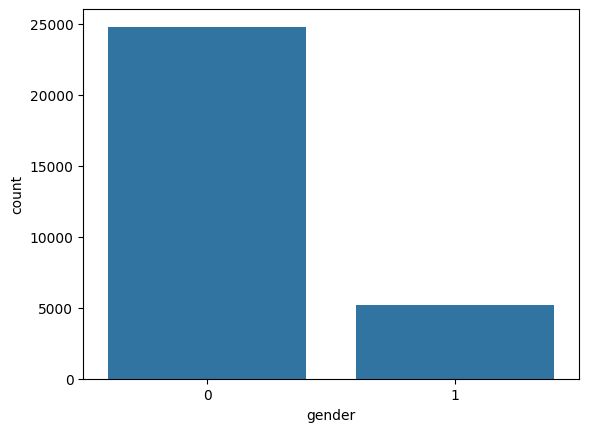

In [100]:
sns.countplot(data=data, x='gender')
plt.show()

<Axes: xlabel='gender', ylabel='basketball'>

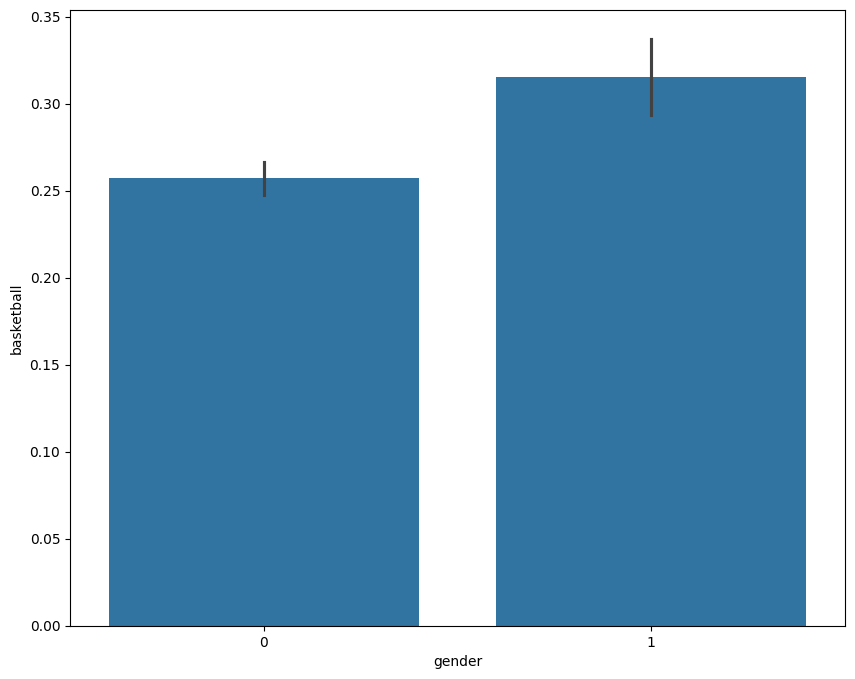

In [101]:
plt.figure(figsize=(10,8))
sns.barplot(data=data, x='gender', y='basketball')

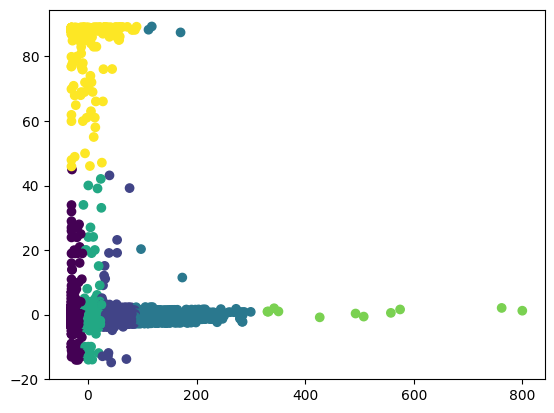

In [102]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

plt.scatter(pca_data[:,0], pca_data[:,1], c=labels)


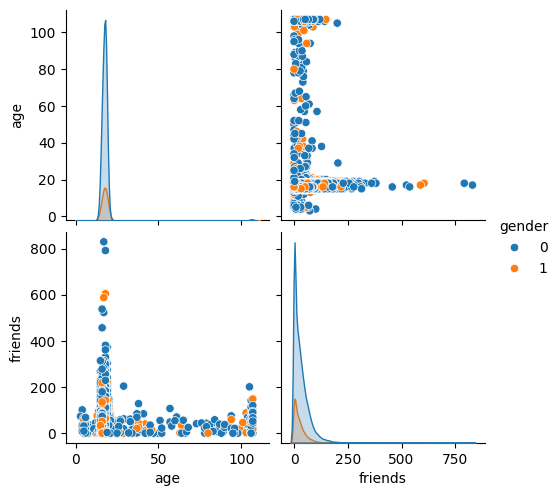

In [103]:
sns.pairplot(data[['age','friends','gender']], hue='gender')


# Creating KMeans Model

In [104]:
km = KMeans(n_clusters=4)

In [106]:
km.fit(data)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [107]:
km.score(data)

-8120376.706561079

In [108]:
km.labels_

array([0, 0, 2, ..., 0, 0, 0], shape=(30000,), dtype=int32)

In [109]:
len(km.labels_)

30000

In [110]:
score = silhouette_score(data, km.labels_)
print("Silhouette Score:", score)

Silhouette Score: 0.5370859906540314


In [111]:
pd.DataFrame(km.labels_).value_counts()

0
0    15733
3     9574
2     4083
1      610
Name: count, dtype: int64

# Show Clusters

In [112]:
cluster_centers = pd.DataFrame(km.cluster_centers_)

In [113]:
cluster_centers

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,2007.439840,0.192462,18.104494,6.532066,0.225450,0.231615,0.193034,0.121782,0.113074,0.117333,...,0.081103,0.221382,0.300261,0.136274,0.054980,0.040170,0.178669,0.101443,0.084472,0.064196
1,2007.773770,0.072131,17.639344,180.585246,0.418033,0.308197,0.249180,0.244262,0.227869,0.163934,...,0.136066,0.422951,0.527869,0.188525,0.145902,0.121311,0.206557,0.140984,0.121311,0.060656
2,2007.631154,0.126378,17.918442,82.276267,0.325741,0.284840,0.276023,0.236591,0.183199,0.152829,...,0.108988,0.335293,0.453098,0.164830,0.098702,0.073720,0.176341,0.125153,0.098457,0.054862
3,2007.525486,0.170671,17.849070,37.238772,0.301650,0.268853,0.247232,0.188531,0.170044,0.152705,...,0.121579,0.272718,0.385837,0.159077,0.077188,0.055149,0.194903,0.128891,0.087111,0.056612


In [115]:
cluster_centers.columns = data.columns 

In [116]:
cluster_centers

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007.439840,0.192462,18.104494,6.532066,0.225450,0.231615,0.193034,0.121782,0.113074,0.117333,...,0.081103,0.221382,0.300261,0.136274,0.054980,0.040170,0.178669,0.101443,0.084472,0.064196
1,2007.773770,0.072131,17.639344,180.585246,0.418033,0.308197,0.249180,0.244262,0.227869,0.163934,...,0.136066,0.422951,0.527869,0.188525,0.145902,0.121311,0.206557,0.140984,0.121311,0.060656
2,2007.631154,0.126378,17.918442,82.276267,0.325741,0.284840,0.276023,0.236591,0.183199,0.152829,...,0.108988,0.335293,0.453098,0.164830,0.098702,0.073720,0.176341,0.125153,0.098457,0.054862
3,2007.525486,0.170671,17.849070,37.238772,0.301650,0.268853,0.247232,0.188531,0.170044,0.152705,...,0.121579,0.272718,0.385837,0.159077,0.077188,0.055149,0.194903,0.128891,0.087111,0.056612


# Check Kmeans with N-Clusters

In [133]:
ssd=[]
for k in range(1,12):
    km = KMeans(n_clusters=k)
    km.fit(data)
    score = km.score(data)
    ssd.append(score)
    print("value of k is :",k)
    

value of k is : 1
value of k is : 2
value of k is : 3
value of k is : 4
value of k is : 5
value of k is : 6
value of k is : 7
value of k is : 8
value of k is : 9
value of k is : 10
value of k is : 11


In [134]:
ssd = np.abs(ssd)

# Create Elbow Plot

Text(0, 0.5, 'ssd')

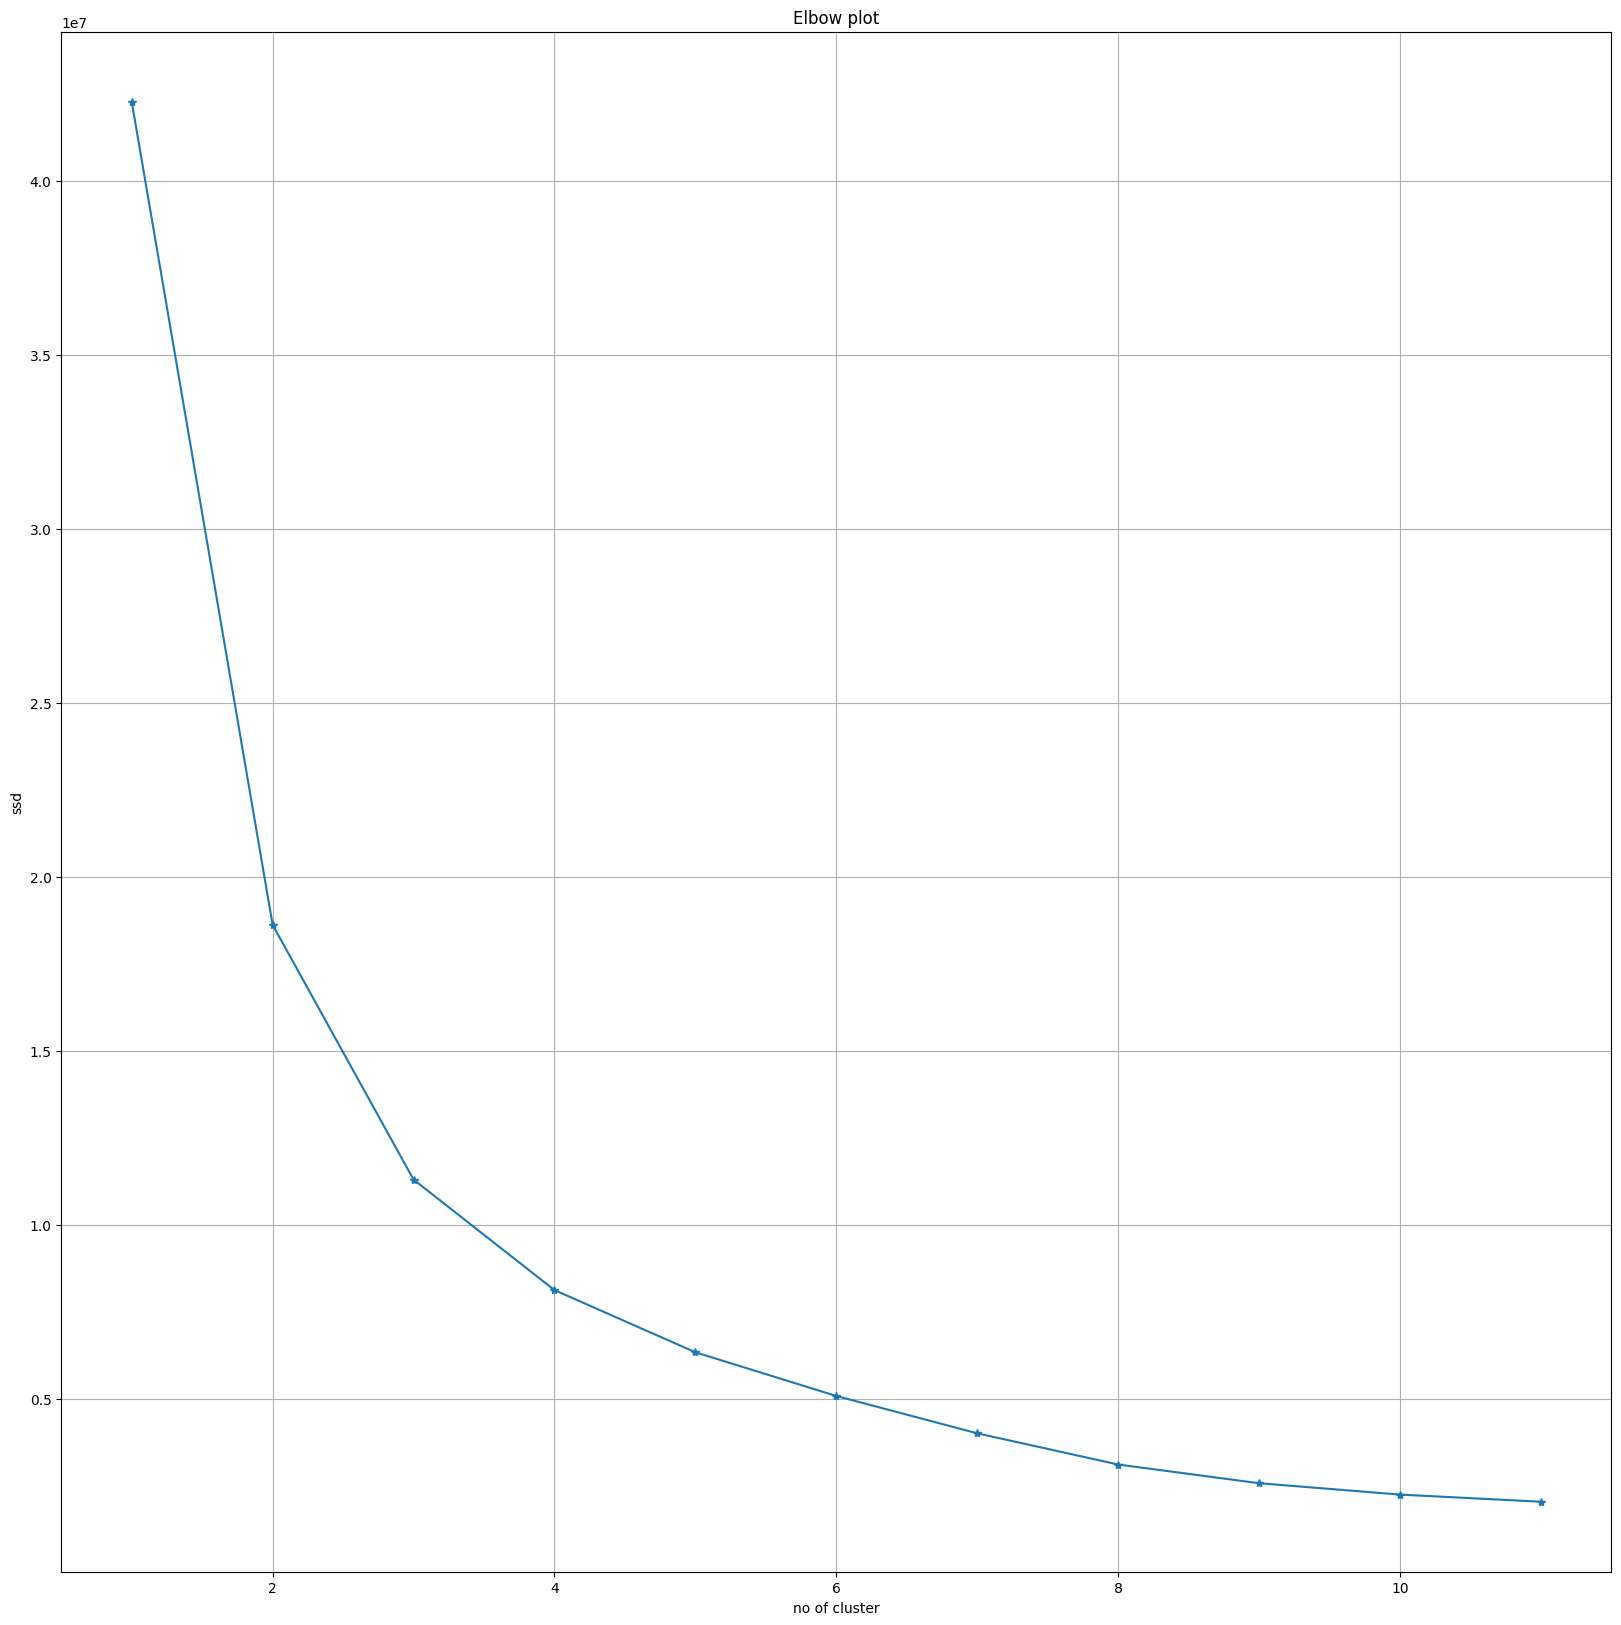

In [135]:
plt.figure(figsize=(20,20))
plt.plot(list(range(1,12)),ssd,marker="*")
plt.grid()
plt.title("Elbow plot")
plt.xlabel("no of cluster")
plt.ylabel("ssd")

In [136]:
ssd=np.round(ssd)

In [137]:
ssd

array([42278081., 18617864., 11296643.,  8120377.,  6333546.,  5077492.,
        4004862.,  3107522.,  2569757.,  2243031.,  2037867.])

In [138]:
l1 = ssd

In [139]:
l2 = []
for i in range(len(l1)-1):
    res = ((l1[i] - l1[i+1])/l1[i] * 100)
    l2.append(np.abs(res))

In [140]:
l2

[np.float64(55.96331820264028),
 np.float64(39.32363562221746),
 np.float64(28.116901631750245),
 np.float64(22.00428625419731),
 np.float64(19.831765649132414),
 np.float64(21.125193304095802),
 np.float64(22.406265184668037),
 np.float64(17.305267669866858),
 np.float64(12.714276096922783),
 np.float64(9.146730473185613)]

# Create Kmeans model for 6 - Clusters

In [142]:
km1 = KMeans(n_clusters=6)

In [143]:
km1.fit(data)

,n_clusters,6
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [144]:
km1.score(data)

-5465301.378597356

In [145]:
score = silhouette_score(data, km1.labels_)
print("Silhouette Score:", score)


Silhouette Score: 0.5458265378089461


In [130]:
data.columns

Index(['gradyear', 'gender', 'age', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

In [131]:
km1.labels_

array([0, 0, 2, ..., 0, 0, 0], shape=(30000,), dtype=int32)

In [132]:
# True labels (gender)
y_true = data['gender'].values

# Cluster labels from KMeans
labels = km1.labels_

# Number of clusters = 5
k = 5

# Step 1: Map each cluster to the most common true gender inside it
mapped_labels = np.zeros_like(labels)

for i in range(k):
    mask = (labels == i)
    if np.sum(mask) > 0:
        mapped_labels[mask] = mode(y_true[mask])[0]

# Step 2: Evaluate the clustering
accuracy = accuracy_score(y_true, mapped_labels)
ari = adjusted_rand_score(y_true, labels)
nmi = normalized_mutual_info_score(y_true, labels)

print("Accuracy:", accuracy)
print("ARI:", ari)
print("NMI:", nmi)


Accuracy: 0.8259333333333333
ARI: -0.014157722448405732
NMI: 0.003348208940434351


# Conclusion
* The K-Means model successfully grouped users into 5 behavioral clusters, but these clusters do not align well with gender differences.

* Although the model shows 82% accuracy, the very low ARI and NMI scores indicate that this accuracy is misleading and mainly due to class imbalance.

* The clustering algorithm captures general behavior patterns, not gender-based separation.

* Overall, the model is useful for behavioral segmentation but not effective for predicting or grouping users by gender.

# ThankYou